In [30]:
# the needed libraries

import pandas as pd
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [4]:
# Importing the data

data = pd.read_csv('DYellowBar.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   query                                      3097 non-null   object 
 1   name                                       3097 non-null   object 
 2   google_id                                  3097 non-null   object 
 3   place_id                                   3097 non-null   object 
 4   location_link                              3097 non-null   object 
 5   reviews_link                               3097 non-null   object 
 6   reviews_per_score                          0 non-null      float64
 7   reviews                                    3097 non-null   int64  
 8   rating                                     3097 non-null   float64
 9   review_id                                  3097 non-null   object 
 10  review_pagination_id    

In [4]:
# Doo NOOOOT RUUN This cell, takes forever to run, the data is saved.
# Translating the review text

from googletrans import Translator
from tqdm import tqdm
import pandas as pd

# Initialize the translator object
translator = Translator()

def review_translator(review_text):
    try:
        # Translate the text to English (source='auto' will detect the source language)
        translated = translator.translate(review_text, src='auto', dest='en')
        return translated.text
    except Exception as e:
        return None  # Handle unexpected errors gracefully

def review_language_detect(review_text):
    if not review_text or len(str(review_text)) < 5:
        return None
    try:
        # Detect the language of the review text
        detected = translator.detect(review_text)
        return detected.lang  # This returns the language code
    except Exception as e:
        return None  # Handle errors gracefully

# Track the translation process
tqdm.pandas()

# Apply the functions to the review text column
data['review_text_translated'] = data['review_text'].progress_apply(review_translator)
data['review_text_language'] = data['review_text'].progress_apply(review_language_detect)

# Print the results
print(data['review_text_translated'])

# Saving the Translated Data:

data.to_csv('TYellowBar.CSV', index=False)

100%|███████████████████████████████████████| 3097/3097 [07:08<00:00,  7.22it/s]

0       This place bans loyal customers without cause....
1                                                    Into
2                                                    Into
3       Super, delicious, healthy breakfasts.Attentive...
4       I went to this little bar with a few expats th...
                              ...                        
3092    Good place i found a bar challenge ended up we...
3093                                                 Into
3094                                                 Into
3095                                                 Into
3096    My favorite place to hang out. Serves bloody M...
Name: review_text_translated, Length: 3097, dtype: object


In [32]:
# Reading the Saved Data:

data = pd.read_csv('TYellowBar.csv')

data['review_text_translated'] = data['review_text_translated'].astype(str).str.lower()


In [10]:
# The Rating Differene Between only rating and written reviews

only_ratings_data = data[(data['review_text_translated'] == 'nan') | (data['review_text_translated'] == 'into')]
reviews_data = data[(data['review_text_translated'] != 'nan') & (data['review_text_translated'] != 'into')]

print(len(only_ratings_data)/len(data)*100, len(reviews_data)/len(data)*100)
print("Only Rating Score: ", only_ratings_data['review_rating'].mean())
print("Review Score: ", reviews_data['review_rating'].mean())
print("Overal Score: ", data['review_rating'].mean())

60.5424604455925 39.45753955440749
Only Rating Score:  4.253866666666666
Review Score:  4.2356792144026185
Overal Score:  4.246690345495641


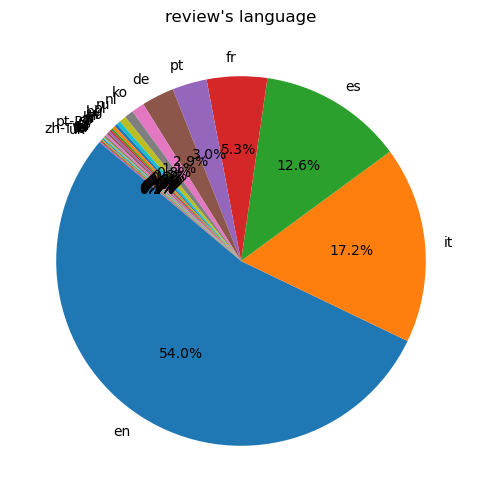

review_text_language
en       624
it       199
es       146
fr        61
pt        35
de        33
ko        13
nl         9
ru         7
pl         4
bg         3
iw         3
tr         2
hr         2
ar         2
sv         2
pt-PT      2
cs         2
ca         1
da         1
el         1
fa         1
ro         1
zh-TW      1
uk         1
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt

counts = data['review_text_language'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
plt.title("review's language")
plt.show()

counts

In [25]:
from collections import Counter
import re

words = ' '.join(reviews_data['review_text_translated']).split()
filtered_words = [word for word in words if len(word) > 3]  # Filter words longer than 3 characters
word_counts = Counter(filtered_words)
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
top_10_words = sorted_words[:30]

print("Top 30 most used words (longer than 3 characters) in the 'review' column:")
for word, count in top_10_words:
    print(f"{word}: {count}")


Top 30 most used words (longer than 3 characters) in the 'review' column:
very: 374
good: 349
place: 282
with: 271
great: 253
nice: 207
they: 190
that: 186
have: 156
people: 154
this: 147
staff: 125
were: 124
from: 122
there: 122
music: 119
hostel: 112
best: 100
live: 96
yellow: 90
atmosphere: 89
drinks: 87
excellent: 85
really: 78
rome: 78
night: 78
food: 76
only: 74
also: 71
friendly: 68


In [16]:
from nltk import ngrams
#now two words togeather

bigrams = ngrams(words, 2)
bigram_counts = Counter(bigrams)
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
top_10_bigrams = sorted_bigrams[:30]

print("Top 30 most used bigrams in the 'review' column:")
print("- - -")
for bigram, count in top_10_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print()

trigrams = ngrams(words, 3)
trigram_counts = Counter(trigrams)
sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)
top_10_trigrams = sorted_trigrams[:30]

print("Top 30 most used trigrams in the 'review' column:")
print("- - -")
for trigram, count in top_10_trigrams:
    print(f"{' '.join(trigram)}: {count}")

Top 30 most used bigrams in the 'review' column:
- - -
of the: 135
in the: 127
and the: 98
place to: 90
at the: 86
the bar: 85
it was: 74
it is: 68
to the: 64
the best: 58
if you: 57
the staff: 55
for a: 54
is a: 54
very good: 53
the yellow: 51
in rome: 50
for the: 49
a great: 48
on the: 47
a good: 45
the hostel: 42
live music: 42
with a: 41
is the: 39
very nice: 39
is very: 39
from the: 38
had a: 38
and i: 36

Top 30 most used trigrams in the 'review' column:
- - -
one of the: 29
if you are: 21
great place to: 20
at the bar: 17
the bar and: 17
a lot of: 17
all over the: 17
live music and: 17
the yellow bar: 17
the staff is: 17
it is a: 17
from all over: 16
place to meet: 16
the bar is: 14
people from all: 13
of the best: 12
to meet new: 12
and it was: 12
for those who: 12
good place to: 11
this place is: 11
you want to: 10
had a great: 10
place to have: 10
to meet people: 10
it was a: 10
a great place: 10
across the street: 10
if you want: 10
this is the: 10


In [48]:
#Searching words in the comments

containing_word = reviews_data[reviews_data['review_text_translated'].str.contains("price")]
print("Number of times that the word appeared:", len(containing_word))
print(" - - - ")
for _ in containing_word['review_text_translated']:
    print(_)
    print("***")

Number of times that the word appeared: 128
 - - - 
asked for a mojito, was told the mint wasn’t prepared??? asked for a cosmo, was told again they couldn’t do it. was given tequila and weak flavoured mineral water and charged more than their advertised price for the cocktails requested. also advertises that they have ciders and don’t have any. severely disappointing and won’t be back.
***
not recommended.annaquati cocktail and high prices
***
i had a great and funny evening in this bar. a lot of students were there. atmosphere was great. board games presen, like jenga.
good price for my longdrink (7€). just cashless payment. life music and later dj. small dancing area.
i could recommend a visit there.
***
i tried this place three times while i was staying at the hostel.

1: i had gotten a pizza from another establishment to go and was hoping to eat it at the bar if i ordered a drink. i was firmly and immediately denied service that i could not bring outside food in. i was referred to 

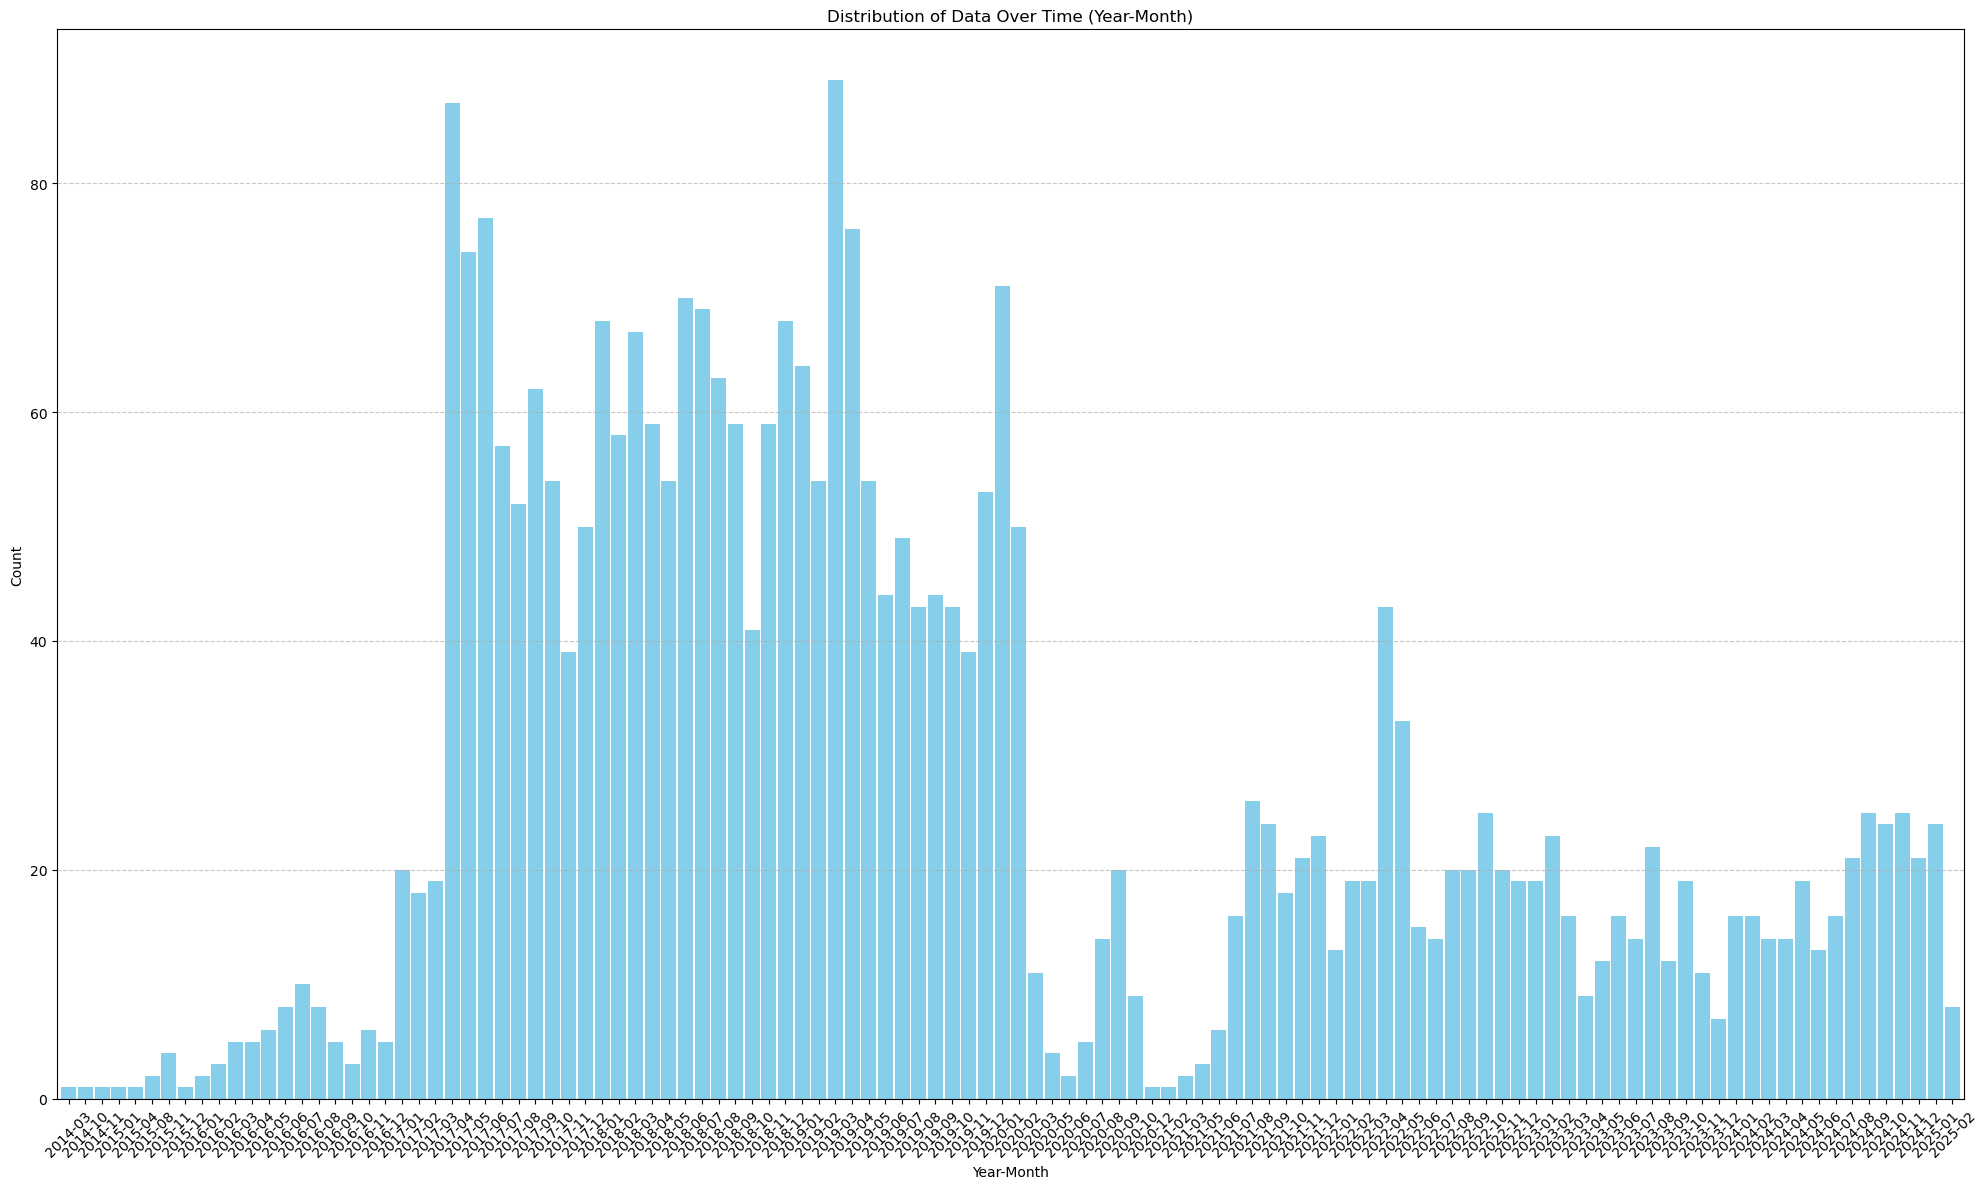

In [28]:
#distribution of comments over the time

# Ensure timestamps are in datetime format
data['review_datetime_utc'] = pd.to_datetime(data['review_datetime_utc'])

# Extract year and month
data['year_month'] = data['review_datetime_utc'].dt.to_period('M')

# Count occurrences of each year-month
month_counts = data['year_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(20, 12))
month_counts.plot(kind='bar', width=.9, color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Distribution of Data Over Time (Year-Month)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout for better display of x-ticks
plt.show()

In [36]:
data = pd.read_csv('TYellowBar.csv')
to_api = data['review_text_translated']
json_payload = to_api.to_json()

In [38]:
print(type(json_payload))

<class 'str'>


In [50]:
from openai import OpenAI

client = OpenAI(
    api_key = "Your Api Key"
)

stream = client.chat.completions.create(
    model="o1-mini",
    messages=[{"role": "user", "content": f"I have this data which is the reviews about a bar, analyse it carefully: {json_payload}"}],
    stream=True,
)
for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="")

Based on the provided review data for the bar, here's a comprehensive analysis covering overall sentiment, common themes, strengths, and areas for improvement.

## **1. Overview of Reviews**

- **Total Reviews Analyzed:** Approximately 3,200 entries.
- **Valid Reviews:** About 60-70% were substantive reviews.
- **Excluded Entries:** 
  - **"Into":** Likely placeholders or incomplete reviews (~30-40%).
  - **"null":** Missing data points (~1-2%).

## **2. Sentiment Analysis**

- **Positive Reviews:** ~45%
  - Highlighting good experiences, friendly staff, and enjoyable atmosphere.
- **Neutral Reviews:** ~15%
  - Brief comments without strong positive or negative sentiment.
- **Negative Reviews:** ~35%
  - Addressing issues like staff behavior, pricing, and security concerns.

**Note:** These percentages are estimations based on the provided excerpts and may vary with the complete dataset.

## **3. Common Themes**

### **A. Positive Aspects**

1. **Friendly and Attentive Staff:**
   - Ma